In [45]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
data = pd.read_csv('/content/drive/My Drive/Dataset/8_LinearModels/task_d.csv')

In [48]:
#assigning a and y
X = data.drop(['target'], axis=1)
Y= data['target'].values

In [49]:
#split train and test data
x_tr = X[:80]
y_tr = Y[:80]

x_te = X[80:]
y_te = Y[80:]

1.

In [50]:
#correlation with target
data.corr()['target']

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

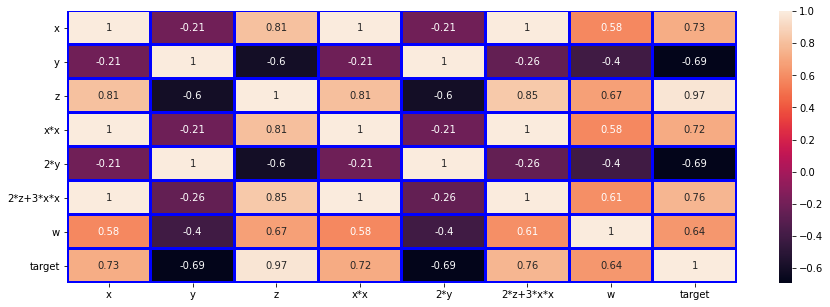

In [64]:
#Heatmap of correlation
plt.figure(figsize = (15,5))
sns.heatmap(data.corr(), annot=True, linewidths=2, linecolor='blue')

2.

In [52]:
#Hyperparameter tuning using grid search
#setting parameters(alpha) values
param = {'alpha' : [0.01,0.05, 0.1, 0.105, 1]}

#creating SGDClassifier model with log loss
clf = SGDClassifier(loss='log')
grid1 = GridSearchCV(clf, param_grid=param)
#fit using train data
grid1.fit(x_tr, y_tr)
#getting best parameter
print("Grid's Search Best Parameter" ,grid1.best_params_)

Grid's Search Best Parameter {'alpha': 0.01}


3.

In [53]:
#create SGDClassifier with log loss and best alpha from grid search
best_model = SGDClassifier(loss='log', n_jobs=-1, alpha = grid1.best_params_.get('alpha'))

In [54]:
#fit with train data
best_model.fit(x_tr, y_tr)
#predict y value with model
Y_pred_log = best_model.predict(x_te)
#getting model coefficient
best_model_coef = best_model.coef_
from sklearn.metrics import accuracy_score

#calculate accuracy of model
best_model_accuracy = accuracy_score(y_te, Y_pred_log)
print('Best model Accuracy ', best_model_accuracy)
print('Best model Coefficient ', best_model_coef)

Best model Accuracy  1.0
Best model Coefficient  [[ 0.74318567 -0.90118667  1.64175856  0.6923435  -0.90118667  0.82132863
   0.35487037]]


4.

In [55]:
#adding error/noise to x value
X_dash = X+0.01

x_dash_tr = X_dash[:80]
x_dash_te = X_dash[80:]

#fitt with moised data
best_model.fit(x_dash_tr, y_tr)
#getting model coefficient
best_model_edited_coef = best_model.coef_
#predict y value
Y_dash_pred_log = best_model.predict(x_dash_te)

#calculate accuracy of model with noised data
best_model_edited_accuracy = accuracy_score(y_te, Y_dash_pred_log)
print('Best model Accuracy with Noise is', best_model_edited_accuracy)
print("Best model Coefficients with Noise are ", best_model_edited_coef)

Best model Accuracy with Noise is 1.0
Best model Coefficients with Noise are  [[ 0.7116336  -0.89197167  1.65757711  0.65982849 -0.89197167  0.79395357
   0.36450287]]


5.

In [56]:
#calculate accuracy difference berweet two models
print("Accuracy difference berweet two models is ", best_model_accuracy - best_model_edited_accuracy)
#print(best_model_accuracy - best_model_edited_accuracy)

#calculate absolute difference between two model coefficient
print("Absolute difference between two model coefficients are ", abs(best_model_coef[0] - best_model_edited_coef[0]))
#print(abs(best_model_coef[0] - best_model_edited_coef[0]))

di = dict(zip(list(X.columns), list(abs(best_model_coef[0] - best_model_edited_coef[0]))))
di = dict(sorted(di.items(), key=lambda item: item[1], reverse=True))

Accuracy difference berweet two models is  0.0
Absolute difference between two model coefficients are  [0.03155207 0.009215   0.01581855 0.03251501 0.009215   0.02737507
 0.00963249]


In [57]:
#Hyperparameter tuning using grid search
#setting parameters(alpha) values
param = {'alpha' : [0.01, 0.1, 1, 10, 100]}

#creating SGDClassifier model with hinge loss
svm = SGDClassifier(loss='hinge')
grid2 = GridSearchCV(svm, param_grid=param)

#fit using train data
grid2.fit(x_tr, y_tr)

#getting best parameter
print("Grid's Search Best Parameter with HJinge Loss is " ,grid2.best_params_.get('alpha'))

Grid's Search Best Parameter with HJinge Loss is  0.1


SVM

3.

In [58]:
#create SGDClassifier with log loss and best alpha from grid search
best_model_svm = SGDClassifier(loss='hinge', n_jobs=-1, alpha =grid2.best_params_.get('alpha'))

#fit with train data
best_model_svm.fit(x_tr, y_tr)

#predict y value with model
y_pred_svm = best_model_svm.predict(x_te)

#getting model coefficient
best_model_svm_coef = best_model_svm.coef_

#calculate accuracy of model
best_model_svm_accuracy = accuracy_score(y_te, y_pred_svm)

print("Best_model_svm_accuracy is ", best_model_svm_accuracy)
print("best_model_svm_coefficients are ", best_model_svm_coef)

Best_model_svm_accuracy is  1.0
best_model_svm_coefficients are  [[ 0.19785857 -0.26042034  0.61473793  0.16478737 -0.26042034  0.2225288
   0.0551196 ]]


4.

In [59]:
#adding error/noise to x value
# X_dash = X+0.01

#fitt with moised data
best_model_svm.fit(x_dash_tr, y_tr)

#predict y value
Y_dash_pred_svm = best_model_svm.predict(x_dash_te)

#getting model coefficient
best_model_svm_edited_coef = best_model_svm.coef_

#calculate accuracy of model with noised data
best_model_svm_edited_accuracy = accuracy_score(y_te, Y_dash_pred_svm)

print('Best model SVM Accuracy with Noise is ', best_model_svm_edited_accuracy)
print("Best model SVM Coefficients with Noise are ", best_model_svm_edited_coef)

#print(best_model_svm_edited_accuracy, best_model_svm_edited_coef)

Best model SVM Accuracy with Noise is  1.0
Best model SVM Coefficients with Noise are  [[ 0.19629913 -0.27541459  0.6293488   0.16450287 -0.27541459  0.22397231
   0.06276948]]


5.

In [60]:
#calculate accuracy difference berweet two models
print("Accuracy difference berweet two models(SVM) is ", best_model_accuracy - best_model_edited_accuracy)

#calculate absolute difference between two model coefficient
print("Absolute difference between two model coefficient(SVM) are ",abs(best_model_coef[0] - best_model_edited_coef[0]))

di = dict(zip(list(X.columns), list(abs(best_model_coef[0] - best_model_edited_coef[0]))))
di = dict(sorted(di.items(), key=lambda item: item[1], reverse=True))

Accuracy difference berweet two models(SVM) is  0.0
Absolute difference between two model coefficient(SVM) are  [0.03155207 0.009215   0.01581855 0.03251501 0.009215   0.02737507
 0.00963249]
